<a href="https://colab.research.google.com/github/mbjallow6/Influence-Maximization-Review/blob/master/social_network_influence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required libraries

import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_com
import networkx.algorithms.centrality as nx_cen
import random 
import copy
import math
import csv
import matplotlib.pyplot as plt
from random import uniform, seed
import pandas as pd
import time
from collections import Counter
%matplotlib inline

from google.colab import files
uploaded = files.upload()


Saving dolphin_csv.csv to dolphin_csv.csv


In [3]:
# I defined two helper fucntions for data 
# procecessing
# get files as csv and return a dataframe
# with pandas, dataframes and numpy arrays 
# are more easier to work with

def get_df_files(file_name):

  df_data = pd.read_csv(file_name)
  return df_data

dolphin_df = get_df_files('dolphin_csv.csv') 
dolphin_df 


,source,target
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish
...,...,...
154,Topless,Zap
155,Ripplefluke,Zig
156,Bumper,Zipfel
157,SN4,Zipfel


In [4]:
# karate network dataset
edge_list = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2),
                 (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1),
                 (7, 2), (7, 3), (8, 0), (8, 2), (9, 2), (10, 0), (10, 4),
                 (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2),
                 (13, 3), (16, 5), (16, 6), (17, 0), (17, 1), (19, 0), (19, 1),
                 (21, 0), (21, 1), (25, 23), (25, 24), (27, 2), (27, 23),
                 (27, 24), (28, 2), (29, 23), (29, 26), (30, 1), (30, 8),
                 (31, 0), (31, 24), (31, 25), (31, 28), (32, 2), (32, 8),
                 (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23),
                 (32, 29), (32, 30), (32, 31), (33, 8), (33, 9), (33, 13),
                 (33, 14), (33, 15), (33, 18), (33, 19), (33, 20), (33, 22),
                 (33, 23), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30),
                 (33, 31), (33, 32)]
karate_df = pd.DataFrame(edge_list, columns=['source', 'target'])


In [5]:
# i defined another helper function to convert a dataframe
# to a numpy array.
# this function can be use to create an adjecency matrix for our dummy data
def get_matrix_data(dolphin_df):

  df = pd.crosstab(dolphin_df.source, dolphin_df.target)
  idx = df.columns.union(df.index)
  df = df.reindex(index=idx, columns=idx, fill_value=0)
  matrix_data = df.to_numpy()
  return matrix_data




In [6]:
# dolphin network
dolphin_data = get_matrix_data(dolphin_df)

In [7]:
karate_data = get_matrix_data(karate_df)
len(karate_data)

34

In [8]:
# dummy netwrok generator

def generate(kout):
    nodes = 128; # the  number    of    nodes;
    nc = 4; # the    number    of    clusters;
    k = 16; # the    average    overall    degree    of    each    node;

    nm = nodes / nc;
    pin = float(k - kout)/(nm - 1);
    pout = float(kout)/ (nm * (nc - 1));

    y0 = np.zeros([nodes,nodes]);
    count = 1;

    for i in range(nodes):
        if i >= nm * count:
            count+=1

        for j in range(i+1,nodes):

            if j <= nm * count:
                p0 = pin
            else:
                p0 = pout
            if (random.random()<= p0):
                y0[i,j] = 1

    return (y0 + y0.T)

a = generate(0.5)
type(a)
a.shape

(128, 128)

In [9]:
df = pd.crosstab(dolphin_df.source, dolphin_df.target)
idx = df.columns.union(df.index)
df = df.reindex(index=idx, columns=idx, fill_value=0)
a_mat = df.to_numpy()
print(len((a_mat)))


62


In [10]:
# I use this function a create a graph 
# pass the numpy array generate by the function above
def create_Graph(graph_data):
  G= nx.from_numpy_matrix(graph_data)
  return G



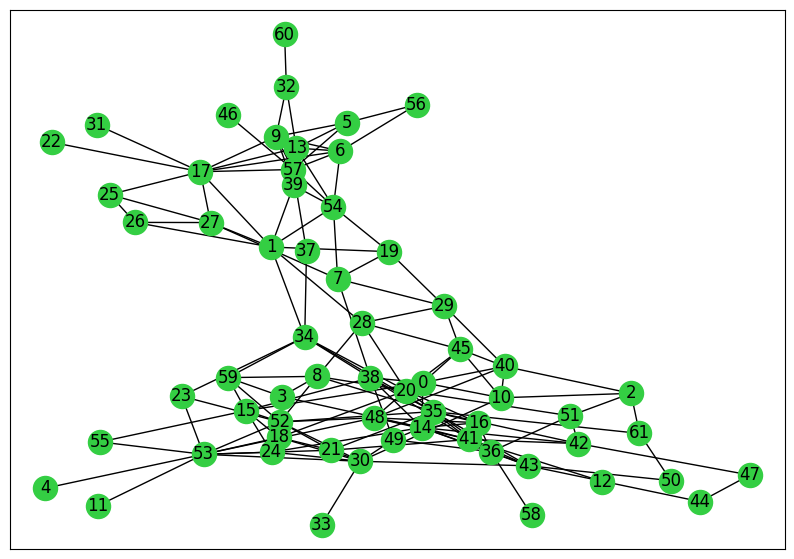

In [11]:
# ploting dolphine network graph
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (10, 7)})
dolphin_graph = create_Graph(dolphin_data)
nx.draw_networkx(dolphin_graph,node_color='#34CE43')
plt.show()

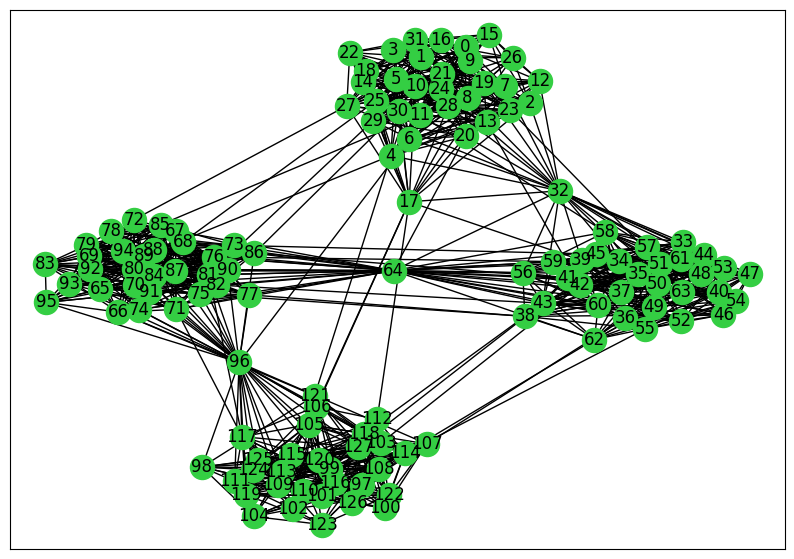

In [12]:
# ploting dummy network graph
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (10, 7)})
dummy_graph = create_Graph(a)
nx.draw_networkx(dummy_graph,node_color='#34CE43')
plt.show()

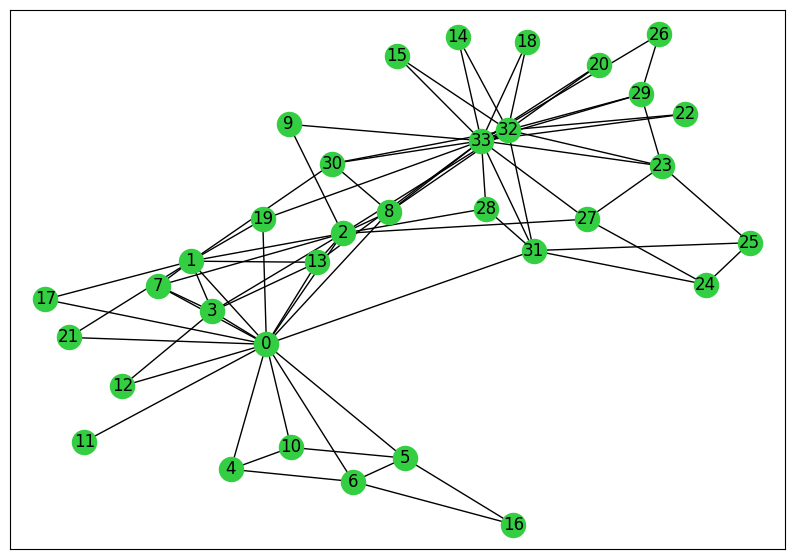

In [13]:
# ploting karate network graph
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (10, 7)})
karate_graph = create_Graph(karate_data)
nx.draw_networkx(karate_graph,node_color='#34CE43')
plt.show()

In [14]:
#  in the following lines of code,i use the networkx
# library to explore the built in community detection fucntions
#  you can observe that each function has a separate definition 
#  depending on their objective function, the pertition the graph
# into various community sizes
girvanNewman_communities = nx_com.girvan_newman(karate_graph)
top_level_communities = next(girvanNewman_communities)
next_level_communities = next(girvanNewman_communities)
print(len(sorted(map(sorted,next_level_communities))))

3


In [15]:
grModularity_communities = list(nx_com.greedy_modularity_communities(karate_graph))
print(len(grModularity_communities))

3


In [17]:
k_Clique_communities = list(nx_com.k_clique_communities(G=dolphin_graph, k=5))
print(len(k_Clique_communities))

2


In [18]:
# helper function to build graph of a dummy data
# not necessary but helpful
def buildG(G, file_):
    row,column=file_.shape
    for i in range(row):
        for j in range(column):
            if file_[i, j] == 1:
                
                G.add_edge(i, j)


In [19]:
# Function to intialize the start population
def initial_pop(G,n,pop,Alpha): 
    x=np.zeros([pop,n])
    for i in range(pop):
        x[i]=range(1,n+1)
    for i in range(pop):
        t=0
        while t<=n*Alpha:
            r=random.randint(1,n)
            if r in G.nodes():
                ider=x[i][r-1]
                neighbors=list(G.edges(r))
                for j in range(len(neighbors)):
                    neighbor=neighbors[j][1]
                    x[i][neighbor-1]=ider
                t+=1
    return x

In [20]:
# Helper function to update the population after each generation
def UpdataPopulation(init_population,matrix_,children,best_candidate):
    row,column=init_population.shape
  
    new_pop = np.zeros([row,column])
    # print(len(new_pop))
    all_pop = np.zeros([row+len(children)+len(best_candidate),column])
    # print(len(all_pop))
    all_pop[0:row]=init_population
    all_pop[row:row+len(children)]=children
    all_pop[-1]=best_candidate
    neighbor_nodes = np.zeros([1,len(all_pop)])
    for i in range(len(all_pop)):
        neighbor_nodes[0][i]=fitness(init_population,all_pop[i])
    Sort_neighbors = np.argsort(neighbor_nodes[0])
    t=-1
    for i in range(len(new_pop)):
        new_pop[i]=all_pop[Sort_neighbors[t]]
        t-=1
    return new_pop

In [21]:
# this functions returns the nodes selected as influencial seeds
def GetCommunity(mating_nodes):
    community_seeds = []
    cluster=()
    
    for i in range(len(mating_nodes)):
        V=()
        ider=mating_nodes[i]
        if ider in cluster:
            continue
        else:
            cluster+=(ider,)
            V+=(i,)
        for j in range(i+1,len(mating_nodes)):
            if mating_nodes[j]==ider:
                V+=(j,)
        community_seeds.append(V)
    return community_seeds

In [22]:
# A helper function to compare the nodes with the best fitness
def FindBest(children,matrix):
    best=0
    for i in range(len(children)):
        if fitness(matrix,children[i])> fitness(matrix,children[best]):
            best=i
    # print('the best children', children[best])
    return children[best]

In [23]:
# This function is very important in this algorithm.
# i reduces the search space by eliminating neightbor nodes.
def FindNeighbors(mating_nodes):
    community_seeds = GetCommunity(mating_nodes)
    num_community_seeds = len(community_seeds)
    n=0
    for i in range(num_community_seeds):
        n =n+len(community_seeds[i])
    if (num_community_seeds -1) ==0:
      neighbors = np.empty([n*( num_community_seeds + 1),n])
    else:
      neighbors = np.empty([n*( num_community_seeds-1),n])
    num=0
    for i in range(num_community_seeds):
        for k in range(len(community_seeds[i])):
            for j in range(num_community_seeds):
                if i==j:
                    continue
                else:
                    neighbors[num]=copy.deepcopy(mating_nodes)
                    neighbors[num][community_seeds[i][k]]=mating_nodes[community_seeds[j][0]]
                    num+=1   
    return neighbors

In [24]:
# this function select parent chromosomes for mating
def selection(init_population,matrix,pool,tour):
    row,column =init_population.shape
    parents = np.zeros([pool,column])
    for i in range(pool):
        a=random.randint(0,row-1)
        for j in range(tour):
            b=random.randint(0,row-1)
            if fitness(matrix,init_population[a])<fitness(matrix,init_population[b]):
                best=b
            else:
                best=a
        parents[i]=init_population[best]
    return parents

In [25]:
# the crosmutate takes two pairs of chromosomes 
# returns offsrpings of the paired chromosomes
def CrossMutate(G,parents,cr_prob,m_prob):
    row,column=parents.shape
    for i in range(0,row-1,2):
        r = random.random()
        if r<cr_prob:
            Round_1=random.randint(0,column-1)
            c=parents[i].copy()
            cluster1=parents[i+1][Round_1]
            for j in range(0,column-1):
                if parents[i+1][j]==cluster1:
                    parents[i][j]=cluster1
            Round_2=random.randint(0,column-1)
            cluster2=c[Round_2]
            for j in range(0,column-1):
                if c[j]==cluster2:
                    parents[i+1][j]=cluster2
        rr=random.random()
        if rr < m_prob: 
            r1 = random.randint(0, row - 1)
            for i in range(column):
                r2 = random.randint(0, column - 1)
                neighbors = list(G.edges(r2))
                r3 = random.randint(0, len(neighbors) - 1)
                neighbor = neighbors[r3][1]
                parents[r1][r2] = parents[r1][neighbor]
    return parents

In [26]:
# the fitness function evaluates the nodes with best fitness
# matrix represent all nodes
# population represent the best nodes
def fitness(matrix,population):
    bw=matrix.sum(axis=1)
    community_seeds=GetCommunity(population)

    mod=0.0
    for i in range(len(community_seeds)):
        # print('commm', community_seeds[i])
        com=0.0
        cut=0.0
        for j in range(len(community_seeds[i])):
            com1=0.0  
            for member in range(len(community_seeds[i] )):#
                com1+=matrix[community_seeds[i][j],community_seeds[i][member]]
            com+=com1
            cut+=(bw[community_seeds[i][j]]-com1)
        mod+=((com-cut)/len(community_seeds[i]))
    return mod

In [ ]:
# x = np.array([1,2,3,4])
# condition = (x<=4) & (x>1)
# print(condition)
# x_sel = np.extract(condition,x)
# print(x_sel)
g.neigbors

[False  True  True  True]
[2 3 4]


In [31]:
# main function
# using dolphine graph
def evolution(max_gen,num_nodes, pop_size, tour, cross_prob= 0.8, mutate_prob= 0.2, Alpha = 0.2, ):
  
  pool = pop_size//2
  data = dolphin_data
  A=data 
  G=nx.Graph()
  buildG(G,data)
  population=initial_pop(G,num_nodes,pop_size,Alpha) #initial population
  t=0     #start generation from zero to the number specify
  BestPop=np.zeros([max_gen,num_nodes])
  timelapse = []
  # try:
  while t<max_gen:
      start_time = time.time()
      parents=selection(population,A,pool,tour)
      children=CrossMutate(G,parents,cross_prob,mutate_prob)
      Bestchild=FindBest(children,A)
      IsLocal=False
      while not IsLocal:
          L=FindNeighbors(Bestchild)
          best=FindBest(L,A)
          if fitness(A,best)>fitness(A,Bestchild):
            Bestchild=best
          else:
            IsLocal=True
      population=UpdataPopulation(population,A,children,Bestchild)
      print ('Generation number: ', t)
      print ('Max fitness for generation: ', t, 'is: ', fitness(A,population[0]))
      BestPop[t]=population[-1]
      # print('pop', BestPop[t])
      t+=1
      timelapse.append(time.time()-start_time)

  # except Exception as ex:
  #   print(ex)
  
  FinalResult=FindBest(BestPop,A)
  CommunityPartion=GetCommunity(FinalResult)
  print ('Community partition:',len(CommunityPartion))
  # print ('Community partition:',CommunityPartion)
  # print('time_elapse:', timelapse)
  return CommunityPartion

In [32]:
# dummy evolution
def evolution1(max_gen,num_nodes, pop_size, tour, cross_prob= 0.8, mutate_prob= 0.2, Alpha = 0.2, ):
  
  pool = pop_size//2
  data = generate(0.5)
  # data = matrix_data
  A=data #Graph data,adj_matrix
  G=nx.Graph()
  buildG(G,data)
  population=initial_pop(G,num_nodes,pop_size,Alpha) #initial population
  t=0     #start generation from zero to the number specify
  BestPop=np.zeros([max_gen,num_nodes])
  timelapse = []
  spread = []
  # try:
  while t<max_gen:
      start_time = time.time()
      parents=selection(population,A,pool,tour)
      children=CrossMutate(G,parents,cross_prob,mutate_prob)
      Bestchild=FindBest(children,A)
      IsLocal=False
      while not IsLocal:
          L=FindNeighbors(Bestchild)
          best=FindBest(L,A)
          if fitness(A,best)>fitness(A,Bestchild):
            Bestchild=best
          else:
            IsLocal=True
      population=UpdataPopulation(population,A,children,Bestchild)
      print ('Generation number: ', t)
      print ('Max fitness for generation: ', t, 'is: ', fitness(A,population[0]))
      BestPop[t]=population[-1]
      t+=1
      timelapse.append(time.time()-start_time)


  # except Exception as ex:
  #   print(ex)
  FinalResult=FindBest(BestPop,A)
  CommunityPartion=GetCommunity(FinalResult)
  print ('Community partition:',len(CommunityPartion))
  # print ('Community partition:',CommunityPartion)
  # print('time_elapse:', timelapse)
  return CommunityPartion

In [33]:
def evolution2(max_gen,num_nodes, pop_size, tour, cross_prob= 0.8, mutate_prob= 0.2, Alpha = 0.2, ):
  
  pool = pop_size//2
  # data = generate(0.5)
  data = karate_data
  A=data #Graph data,adj_matrix
  G=nx.Graph()
  buildG(G,data)
  population=initial_pop(G,num_nodes,pop_size,Alpha) #initial population
  t=0     #start generation from zero to the number specify
  BestPop=np.zeros([max_gen,num_nodes])
  timelapse = []
  # communities = []
  # try:
  while t<max_gen:
      start_time = time.time()
      parents=selection(population,A,pool,tour)
      children=CrossMutate(G,parents,cross_prob,mutate_prob)
      Bestchild=FindBest(children,A)
      # print('I ma the best child', Bestchild)
      IsLocal=False
      while not IsLocal:
          L=FindNeighbors(Bestchild)
          # print('these are the neigboors of best child', L[0])
          best=FindBest(L,A)
          # print('the best neigbor', np.unique(best))
          if fitness(A,best)>fitness(A,Bestchild):
            Bestchild=best
          else:
            IsLocal=True
      population=UpdataPopulation(population,A,children,Bestchild)
      # print('update population', population[-1])
      print ('Generation number: ', t)
      print ('Max fitness for generation: ', t, 'is: ', fitness(A,population[0]))
      BestPop[t]=population[0]
      timelapse.append(time.time()-start_time)
      t+=1

  # except Exception as ex:
  #   print(ex)
  # print(spread)
  FinalResult=FindBest(BestPop,A)
  # print('the final results', FinalResult)
  CommunityPartion=GetCommunity(FinalResult)
  print ('Community partition:',len(CommunityPartion))
  # communities.append(CommunityPartion)
  # print ('Community partition:',CommunityPartion)
  # print('time_elapse:', timelapse)
  return CommunityPartion

In [42]:
# karate_evolution = evolution2(max_gen=2, num_nodes = 34,pop_size=120,mutate_prob=0.2, tour=2)
# karate_evolution

karate_evolution ,dolphin_evolution, dummy_evolution = [],[],[]
for i in range(1,11):
  karate = evolution2(max_gen= i,num_nodes= 34,pop_size= 120, tour=2)
  karate_evolution.append(karate)
  dolphin = evolution(max_gen=i,num_nodes=62, pop_size=220,tour=2)
  dolphin_evolution.append(dolphin)
  dummy = evolution1(max_gen=i, num_nodes=128,pop_size=450,tour=2)
  dummy_evolution.append(dummy)



Generation number:  0
Max fitness for generation:  0 is:  2.2941176470588234
Community partition: 1
Generation number:  0
Max fitness for generation:  0 is:  2.564516129032258
Community partition: 26
Generation number:  0
Max fitness for generation:  0 is:  17.203125
Community partition: 8
Generation number:  0
Max fitness for generation:  0 is:  2.2941176470588234
Generation number:  1
Max fitness for generation:  1 is:  2.2941176470588234
Community partition: 1
Generation number:  0
Max fitness for generation:  0 is:  2.564516129032258
Generation number:  1
Max fitness for generation:  1 is:  1.5901639344262297
Community partition: 22
Generation number:  0
Max fitness for generation:  0 is:  17.15625
Generation number:  1
Max fitness for generation:  1 is:  28.37408568443051
Community partition: 6
Generation number:  0
Max fitness for generation:  0 is:  2.2941176470588234
Generation number:  1
Max fitness for generation:  1 is:  -0.7272727272727271
Generation number:  2
Max fitness 

In [ ]:
karate_evolution[0][0]

In [35]:
from networkx import *
def IC(g,S,p=0.5,mc=1000):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """
    
    # Loop over the Monte-Carlo Simulations
    spread = []
    for i in range(mc):
        
        # Simulate propagation process      
        new_active =S[:]
        # print('new active',new_active)
        A = S[:]
        
        while new_active:

            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:
                
                # Determine neighbors that become infected
                np.random.seed(i)
                success = np.random.uniform(0,1,len(list(g.neighbors(node)))) < p
                # print("success", success)
                # print('new onessssss', list(np.extract(success, g.neighbors(node))))
                new_ones += list(np.extract(success, list(g.neighbors(node))))
                # print('new onesss ', new_ones)

            new_active = list(set(new_ones) - set(A))
            # print( 'new active', new_active)
            # print(' lest see how A', A)
            
            # Add newly activated nodes to the set of activated nodes
            
            A += new_active
            # print('AAAAAAAAAAA', A)

            
        spread.append(len(A))
        # print('this aaaaaaaaaaa A', A)
        
    return (np.mean(spread))

In [47]:
# seed_set = list(dolphine_evolution[1][0])
# spread = IC(dolphine_graph, seed_set, 0.5,100)
# spread
karate_sp, dolphin_sp, dummy_sp = [],[],[]
for i in range(10):
  karate_seed = list(karate_evolution[i][0])
  karate_spread = IC(karate_graph,karate_seed, p=0.5, mc = 10)
  karate_sp.append(karate_spread)
  dolphin_seed = list(dolphin_evolution[i][0])
  dolphin_spread = IC(dolphin_graph,dolphin_seed, p=0.5, mc = 10)
  dolphin_sp.append(dolphin_spread)
  dummy_seed = list(dummy_evolution[i][0])
  dummy_spread = IC(dummy_graph,dummy_seed, p=0.5, mc = 10)
  dummy_sp.append(dummy_spread)


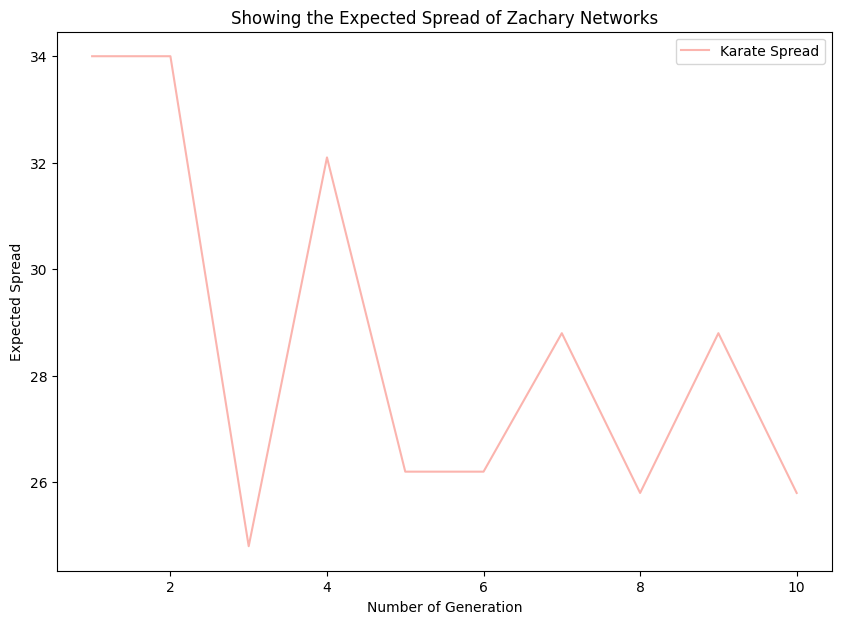

In [48]:
plt.plot(range(1,len(karate_sp)+1),karate_sp,label="Karate Spread",color="#FBB4AE")
plt.xlabel('Number of Generation'); plt.ylabel('Expected Spread')
plt.title('Showing the Expected Spread of Zachary Networks'); plt.legend(loc=1);
plt.show()

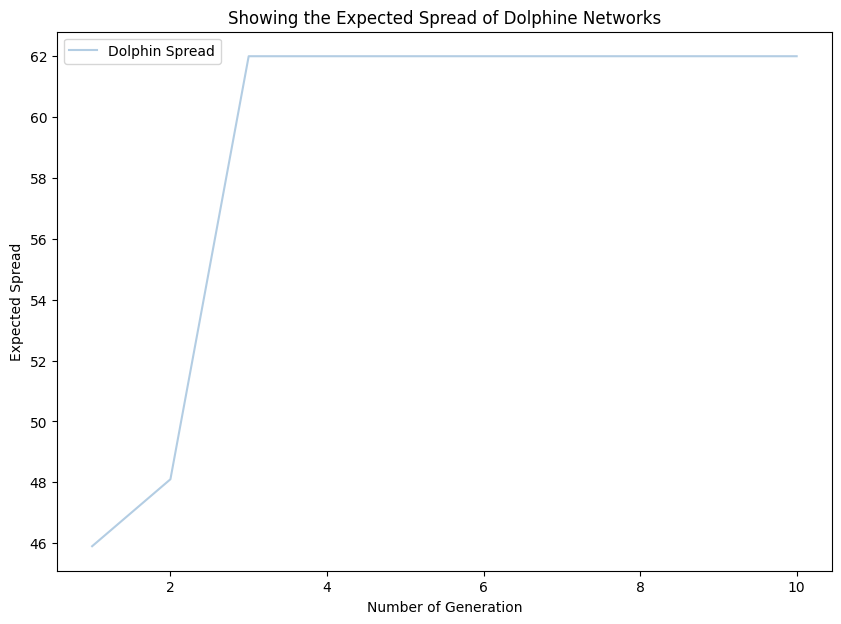

In [49]:
plt.plot(range(1,len(dolphin_sp)+1),dolphin_sp,label="Dolphin Spread",color="#B3CDE3")
plt.xlabel('Number of Generation'); plt.ylabel('Expected Spread')
plt.title('Showing the Expected Spread of Dolphine Networks'); plt.legend(loc=2);
plt.show()


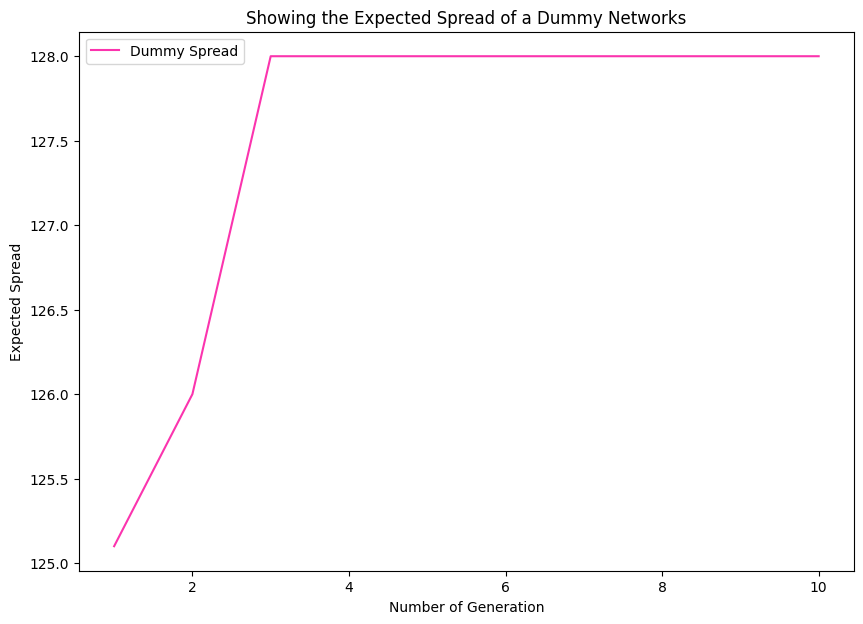

In [50]:
plt.plot(range(1,len(dummy_sp)+1),dummy_sp,label="Dummy Spread",color="#FB34AE")
plt.xlabel('Number of Generation'); plt.ylabel('Expected Spread')
plt.title('Showing the Expected Spread of a Dummy Networks'); plt.legend(loc=2);
plt.show()

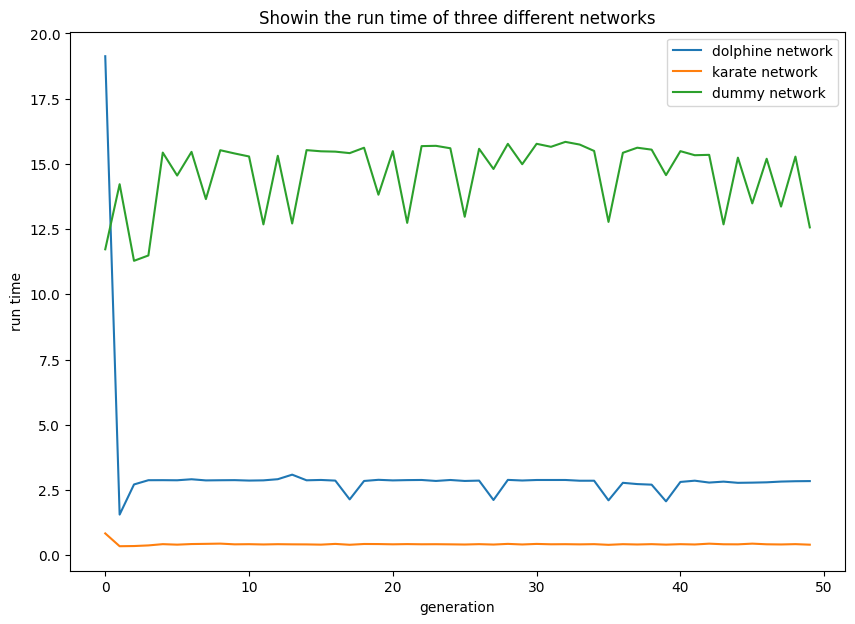

In [ ]:
def runtime_plot(x,y,z):
  plt.plot(x, label = 'dolphine network')
  plt.plot(y,  label = 'karate network')
  plt.plot(z, label = 'dummy network')

  plt.xlabel('generation')
  plt.ylabel('run time')

  plt.title('Showing the run time of three different networks')
  plt.legend()
  plt.show()
plot = runtime_plot(dolphine_evolution, karate_evolution,dummy_evolution)
plot
